## Observations and Insights 

In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Reviewing the data from first input file
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Reviewing the data from first input file
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID

# Identifying the row that contains duplicate data
study_results.loc[study_results.duplicated()==True]
# removing the duplicate row
study_results_clean=study_results.drop_duplicates()
print(f"Original study_results number of samples - {len(study_results)}, cleaned up number of samples - {len(study_results_clean)}")

Original study_results number of samples - 1893, cleaned up number of samples - 1892


In [143]:
# Combine the data into a single dataset
all_data_inner=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID', how='inner')
all_data_inner.head()

all_data_outer=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID', how='outer')
all_data_outer.head()

# Compare inner vs outser merge results
# print(f"Merged data row count:\nInner\t\t{len(all_data_inner)}\nOuter\t\t{len(all_data_outer)}")

# Since it seems that type of merging has no effect, we can assume that each table contains exactly 
# the same number of values and values themselves of the Mouse ID
all_data=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID')

# Display the data table for preview
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
nmb_mice=all_data['Mouse ID'].nunique()
print(f"Number of mice\t\t{nmb_mice}")

Number of mice		249


In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_duplicate=study_results.loc[study_results.duplicated()==True]['Mouse ID'].unique()[0]
print(f"Mouse ID which had duplicate data:\t{mouse_id_duplicate}")

Mouse ID which had duplicate data:	g989


In [44]:
# Optional: Get all the data for the duplicate mouse ID.
g989_data=all_data[all_data['Mouse ID']== mouse_id_duplicate]
                   
# Group all data by Drug Regimen
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# pull out statistics on Tumor Volume (mm3)
all_data_by_drug['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data_wo_g989=all_data[all_data['Mouse ID']!= mouse_id_duplicate]
all_data_wo_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
nmb_mice_wo_g989=all_data_wo_g989['Mouse ID'].nunique()
print(f"Number of mice\t\t{nmb_mice_wo_g989}")

Number of mice		248


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group all data by Drug Regimen
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# Set up data dictionary to later convert to summary data frame
tumor_vol_by_drug_dic={
    # pull out statistics on Tumor Volume (mm3)
    "Mean" : all_data_by_drug['Tumor Volume (mm3)'].mean(),
    "Median" : all_data_by_drug['Tumor Volume (mm3)'].median(),
    "Variance" : all_data_by_drug['Tumor Volume (mm3)'].var(),
    "Standard deviation" : all_data_by_drug['Tumor Volume (mm3)'].std(),
    "Standard error of the mean" : all_data_by_drug['Tumor Volume (mm3)'].sem()
}
tumor_vol_by_drug=pd.DataFrame(tumor_vol_by_drug_dic)
tumor_vol_by_drug

,Mean,Median,Variance,Standard deviation,Standard error of the mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
all_data_by_drug['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug regiment'>

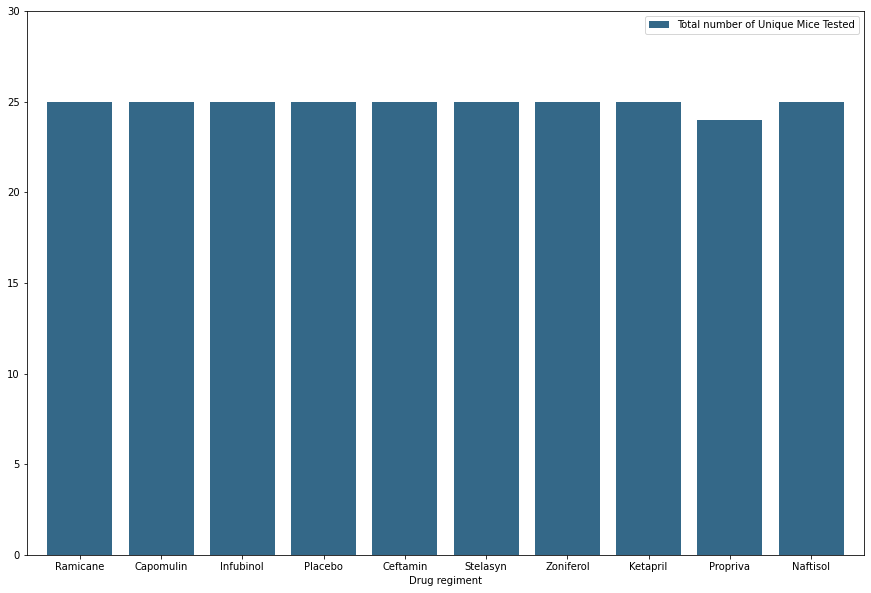

In [118]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# List of unique drug names
list_of_drugs=all_data['Drug Regimen'].unique()

# Creating a pandas dataframe
df = pd.DataFrame({'Drug regiment': list_of_drugs, 
                   'Total number of Unique Mice Tested': all_data_by_drug['Mouse ID'].nunique()})
  
# Creating a bar graph of size 15 inches wide and 10 inches high
df.plot(kind='bar',
        x='Drug regiment', 
        y='Total number of Unique Mice Tested', 
        rot=0, 
        color='#346888',
        figsize=(15, 10), 
        ylim=(0,30),
        width=0.8,
       align='center')


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

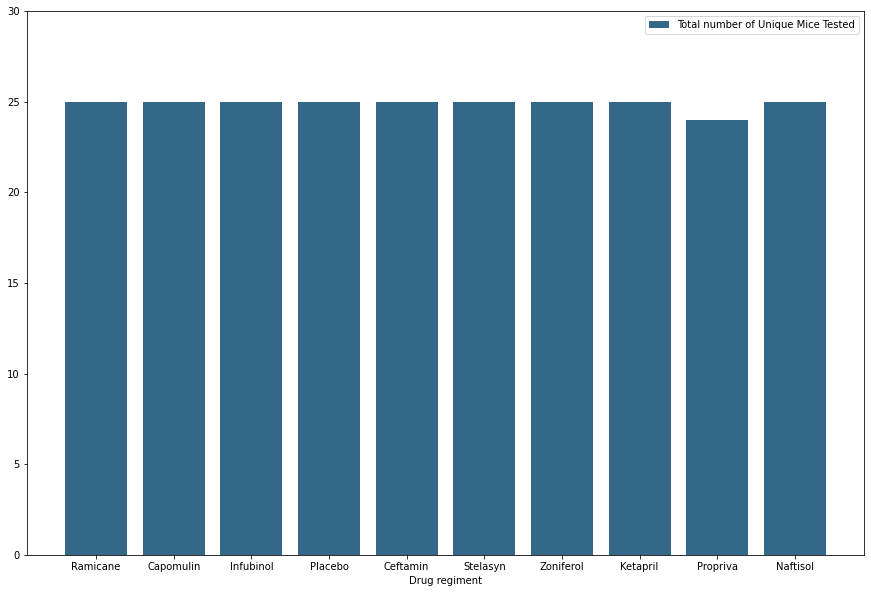

In [119]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(15,10))
plt.bar(list_of_drugs,
        all_data_by_drug['Mouse ID'].nunique(), 
        color='#346888', 
        width=0.8,
        label="Total number of Unique Mice Tested",
        align='center'
       )
plt.ylim([0,30])
plt.xlabel("Drug regiment")
plt.legend()
# plt.xlabel()
plt.tight_layout
# pd.plot.bar(x=list_of_drugs, y=all_data_by_drug['Mouse ID'].nunique(), rot=0, figsize=(15, 10))

<AxesSubplot:ylabel='Percentage of Male vs Female Mice'>

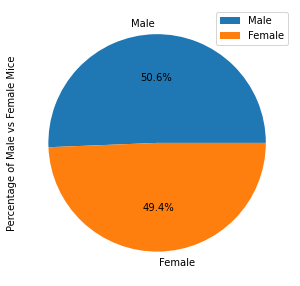

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Creating a pandas dataframe
df = pd.DataFrame({'Percentage of Male vs Female Mice': all_data['Sex'].value_counts()}, 
                  index=all_data['Sex'].unique())
# Creating the pie plot
df.plot(kind='pie',
        y='Percentage of Male vs Female Mice', 
        figsize=(5, 5),
       autopct='%1.1f%%')


Text(0, 0.5, 'Percentage of Male vs Female Mice')

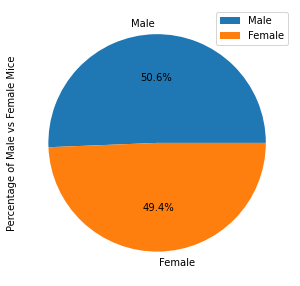

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(all_data['Sex'].value_counts(), 
        labels=all_data['Sex'].unique(), autopct="%1.1f%%")
plt.legend()
plt.ylabel('Percentage of Male vs Female Mice')
# all_data['Sex'].value_counts()

## Quartiles, Outliers and Boxplots

In [171]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Creating a list of selected drugs
best_4_drugs=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Filetring the dataset to only the selected drug records
best_4_drugs_data=all_data[all_data['Drug Regimen'].isin(best_4_drugs)]
# best_4_drugs_data['Drug Regimen'].unique()

# Start by getting the last (greatest) timepoint for each mouse
best_4_drugs_last_timepoint_data=best_4_drugs_data[best_4_drugs_data['Timepoint']==best_4_drugs_data['Timepoint'].max()]
# print(best_4_drugs_last_timepoint_data[best_4_drugs_last_timepoint_data['Drug Regimen']=="Ramicane"])
pd.DataFrame(best_4_drugs_last_timepoint_data.groupby(['Mouse ID','Drug Regimen'])['Tumor Volume (mm3)'].max())
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [222]:
# Put treatments into a list for for loop (and later for plot labels)
best_4_drugs=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_4_plotting=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in best_4_drugs:
    print(drug)
#   Filter out data for a specific drug 
    data_per_drug=best_4_drugs_last_timepoint_data[best_4_drugs_last_timepoint_data['Drug Regimen']==drug]
#   Calculate Q1, Q2 and Q3 stats  
    q=data_per_drug['Tumor Volume (mm3)'].quantile([0.25,0.50,0.75])
    print(q)
#   Calculate IQR  
    iqr=q[0.75]-q[0.25]
    print(f"iqr is {iqr}")
    if (row['Tumor Volume (mm3)']>=(q[0.25]-1.5*iqr)) and (row['Tumor Volume (mm3)']<=(q[0.75]+1.5*iqr)):
        data_per_drug['Outlier']=False
    else:
        data_per_drug['Outlier']=True
#     for i, row in data_per_drug.iterrows():
# #         print(row)
#         if (row['Tumor Volume (mm3)']>=(q[0.25]-1.5*iqr)):# and (data_per_drug[row]['Tumor Volume (mm3)']<=q[0.75]+1.5*iqr)):
#             row['Outlier']=False
#         else :
#             row['Outlier']=True
# #         print(row)
#         tumor_vol_data_4_plotting.append(pd.DataFrame(data_per_drug)
    
    print(data_per_drug)    
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
0.25    32.377357
0.50    37.311846
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
iqr is 7.781863460000004
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
19      s185    Capomulin  Female           3          17         45   
29      x401    Capomulin  Female          16          15         45   
39      m601    Capomulin    Male          22          17         45   
104     u364    Capomulin    Male          18          17         45   
124     y793    Capomulin    Male          17          17         45   
134     r554    Capomulin  Female           8          17         45   
144     m957    Capomulin  Female           3          19         45   
164     t565    Capomulin  Female          20          17         45   
204     i738    Capomulin  Female          23          20         45   
224     w914    Capomulin    Male          24          21         45   
244     g288    Capomulin    Male           3          19         45   
282   

<ipython-input-222-94ac15dfe70d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_drug['Outlier']=True
<ipython-input-222-94ac15dfe70d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_drug['Outlier']=True
<ipython-input-222-94ac15dfe70d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
